# Project Title: Red Wine Quality Prediction

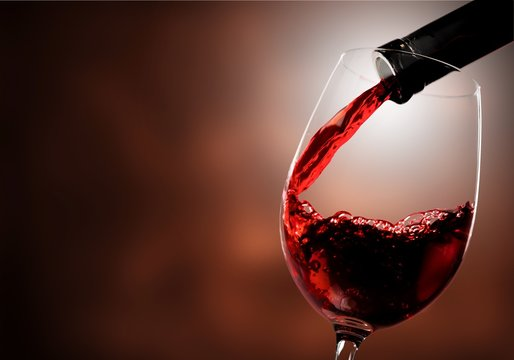


# Introduction:
The aim of this project is to predict the quality of red wine based on its physicochemical properties. The dataset used in this analysis contains various attributes such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and the quality rating of the wine.


1 Introduction: Predict red wine quality using machine learning to aid producers in quality control.
2 Dataset Overview: Dataset includes physicochemical properties and quality ratings of red wine samples.
3 EDA: Explore data distributions and relationships visually to identify patterns.
4 Data Preprocessing: Clean data by handling missing values, outliers, and scaling features.
5 Feature Selection: Choose relevant features using correlation analysis and importance scores.
6 Model Building: Select random forest classifier and train it on data split into training and testing   sets.
7 Evaluation: Assess model performance using accuracy, precision, recall, and F1-score metrics.
8 Conclusion: Machine learning predicts red wine quality effectively, aiding producers in maintaining consistent quality. Opportunities for further research and improvement exist.









# importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing or loading dataset

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset has been imported from the provided URL using pandas read_csv() function, and it is stored in the DataFrame wine_data.

# Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


df info have 1599 observation inside of a dataset and we dont have any null value it is good dataset and memory consuming 150kb overall .it is small sataset

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


this df.describe will provide all the statical information about all numeric columns and we can see the count, mean, standard deviation, minimum, maximum values and this a high level statistic we are getting from it.

# Finding Null values

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we dont have any null value inside of any column in our dataset and this ia s good dataset and no missing values.

<Axes: >

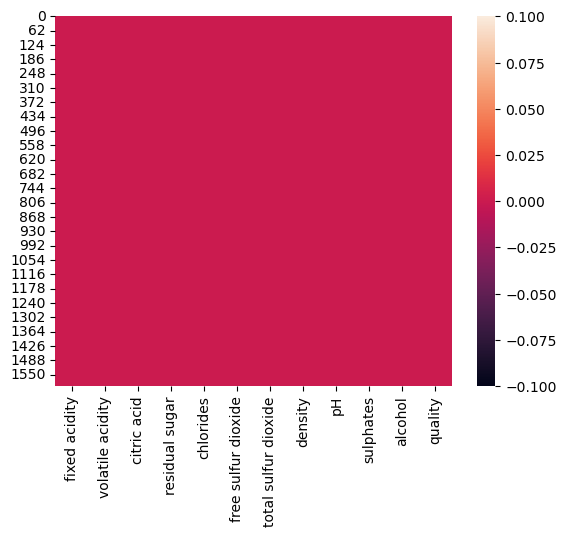

In [11]:
#let visualize it using heatmap
sns.heatmap(df.isnull())

we can see their is no null values and missing values..

# Visualization

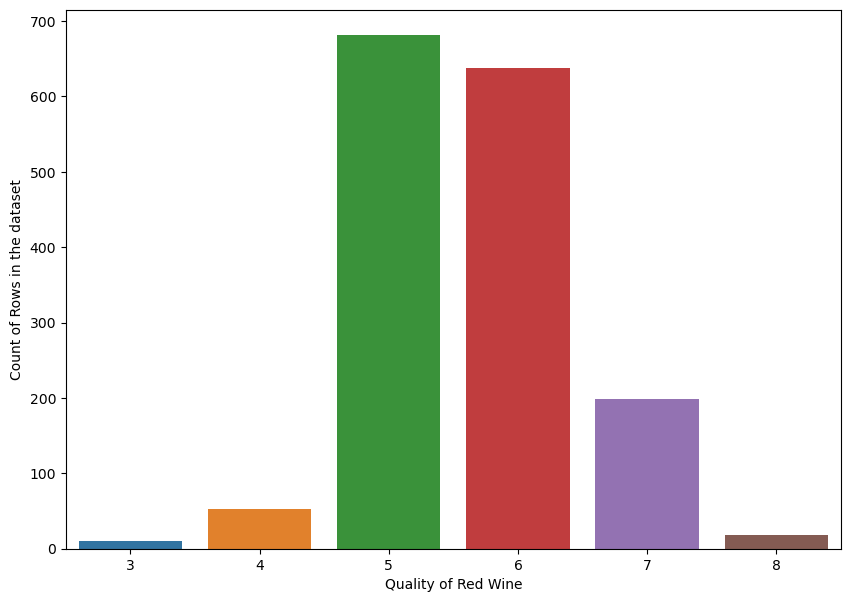

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

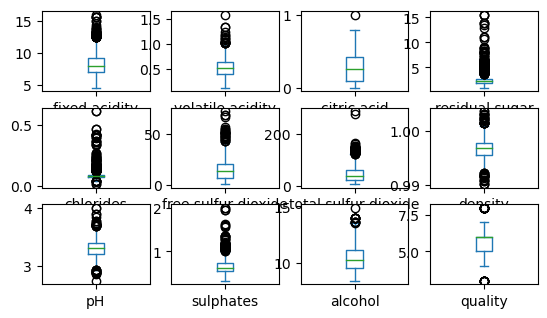

In [15]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

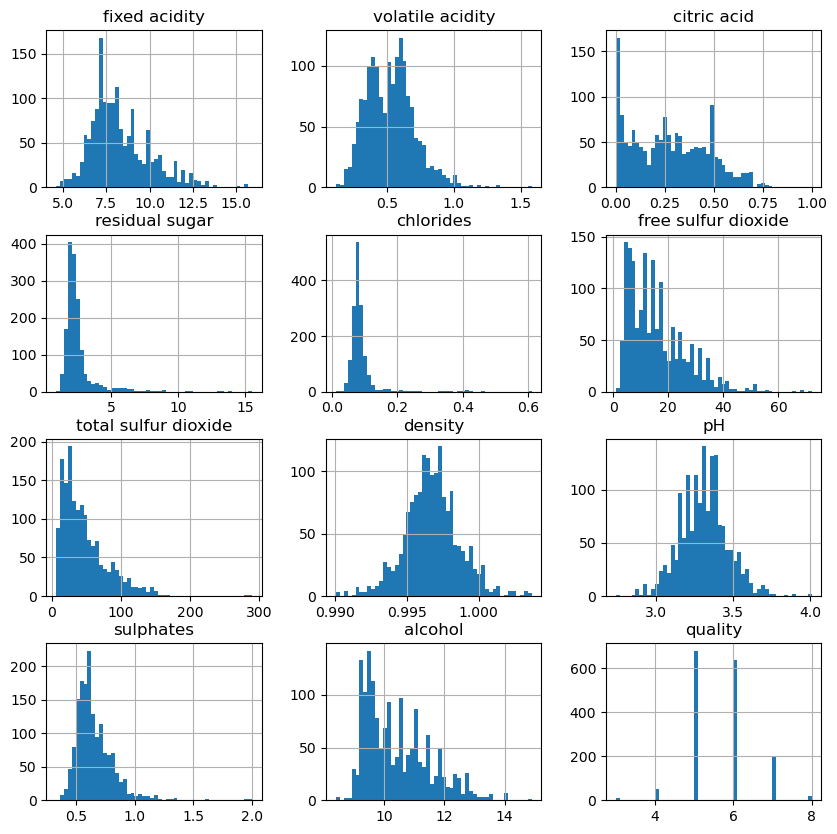

In [17]:
df.hist(figsize=(10,10),bins=50)
plt.show()

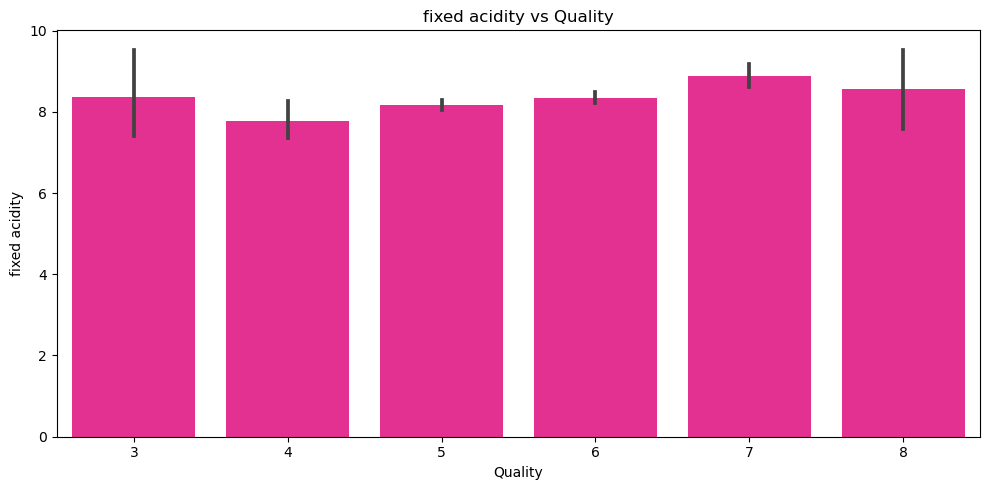

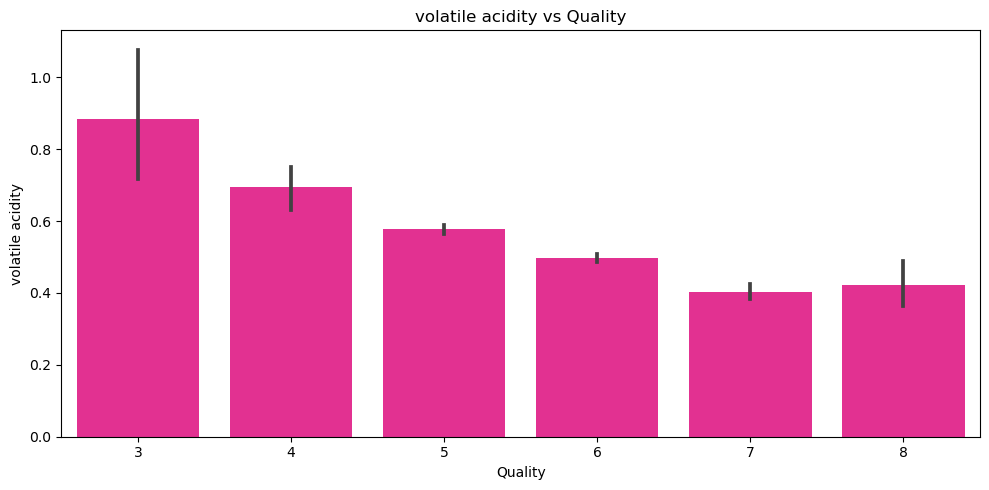

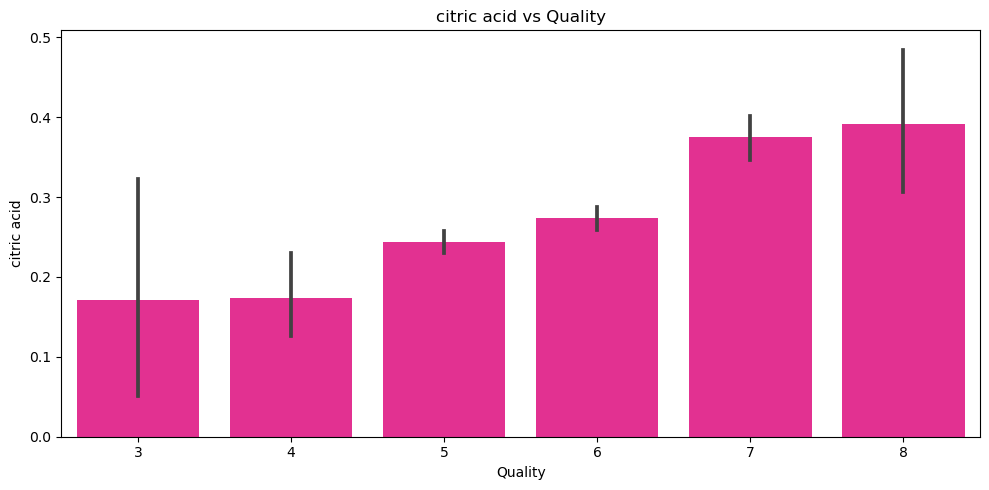

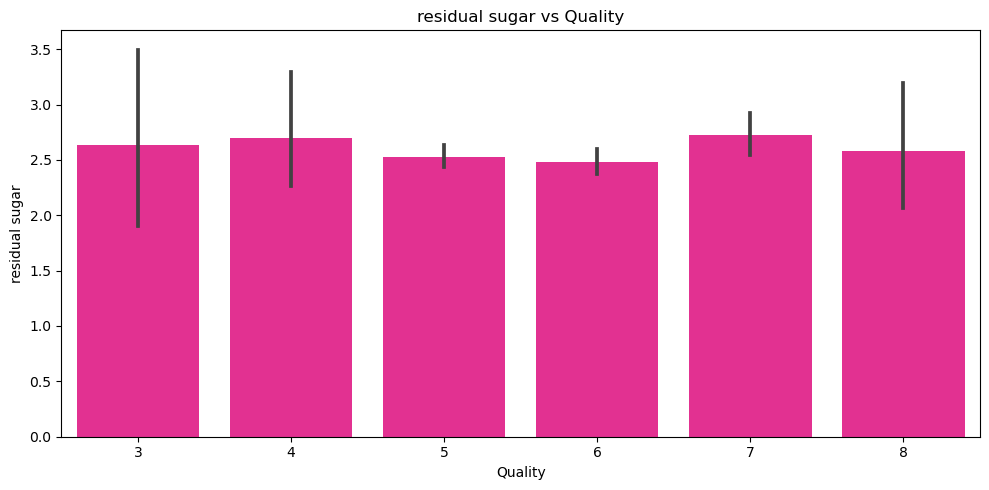

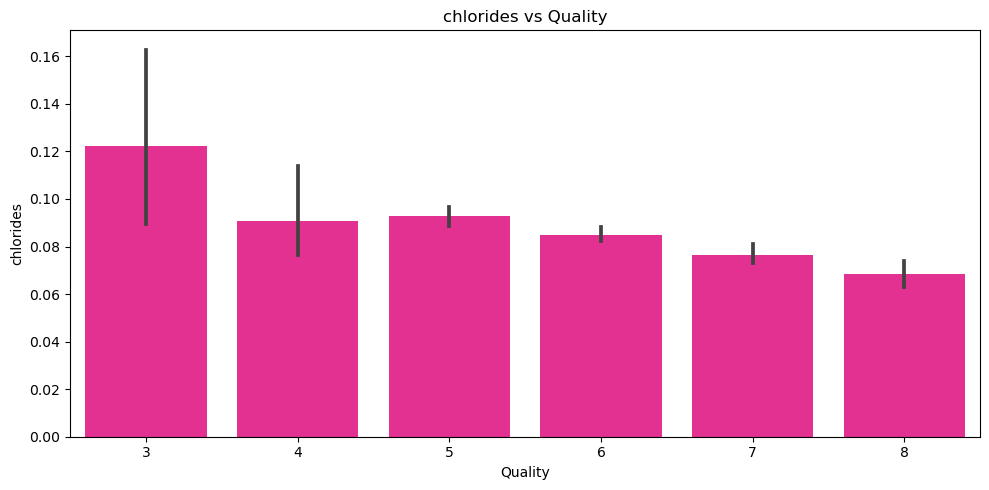

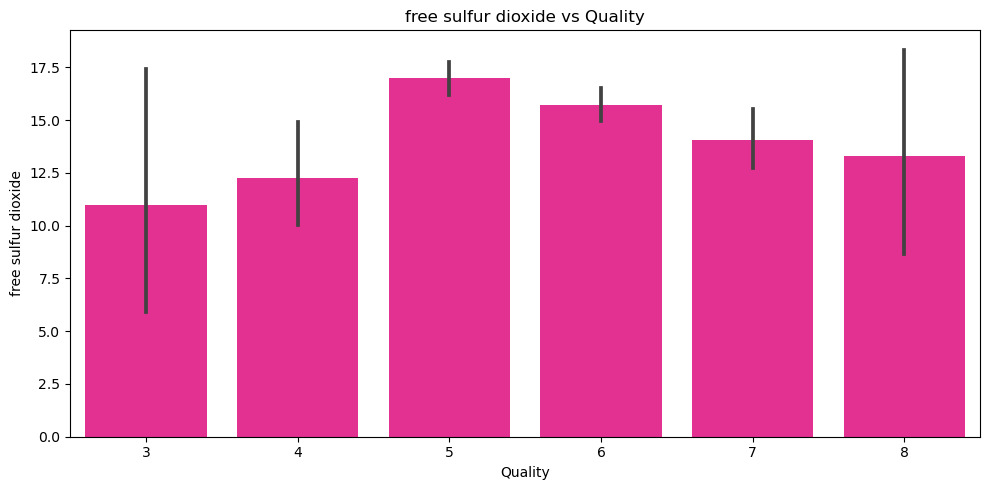

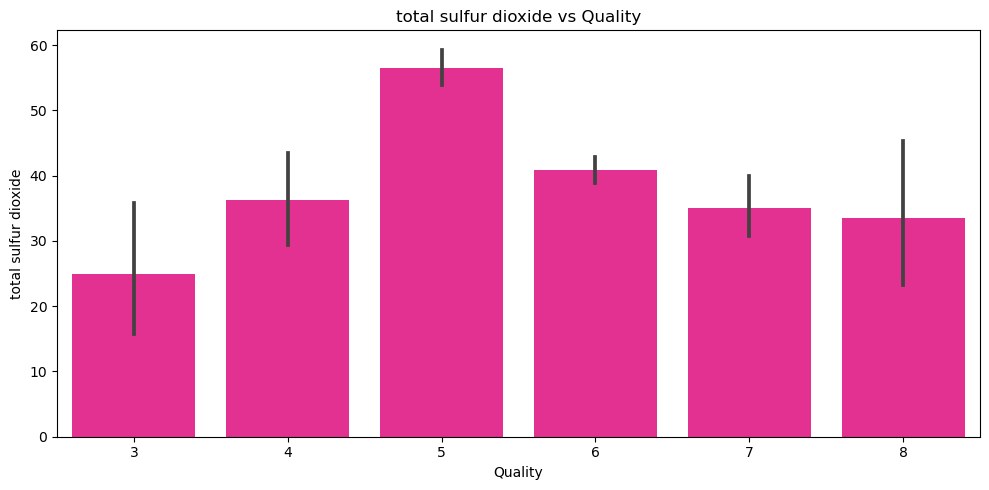

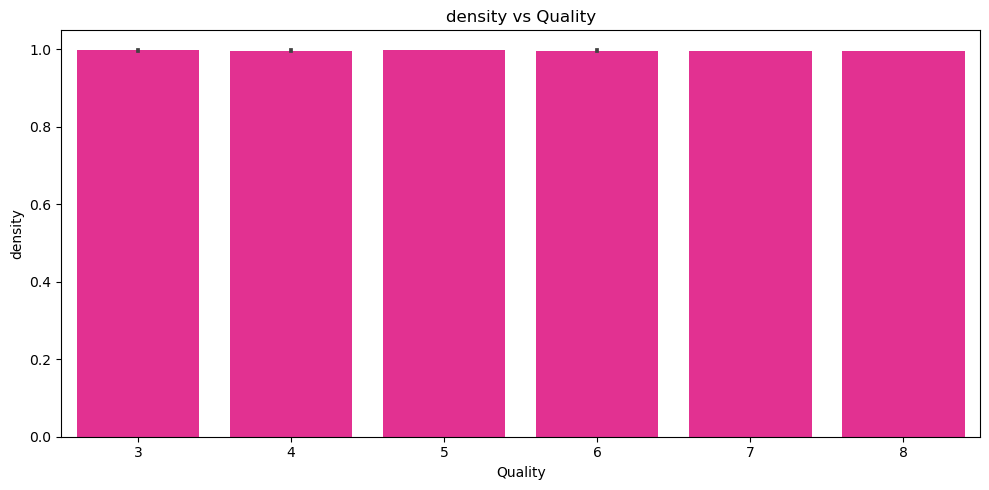

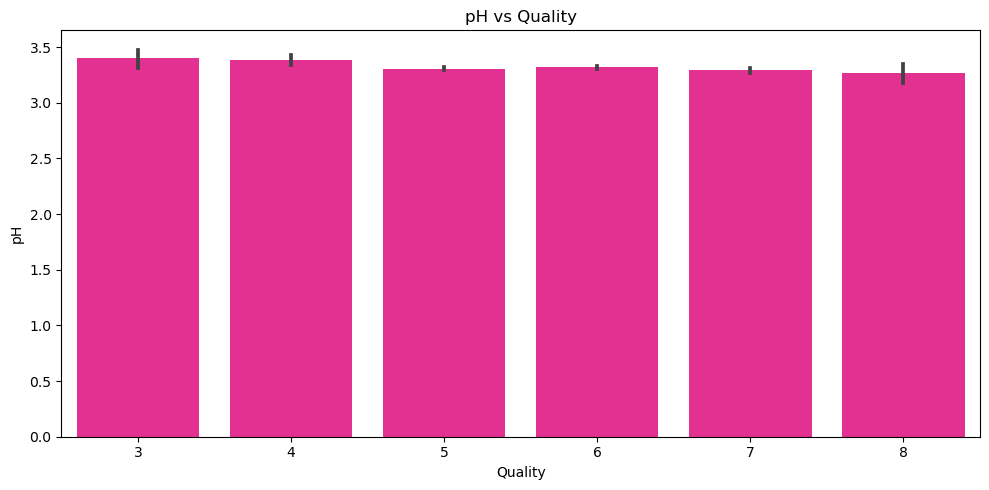

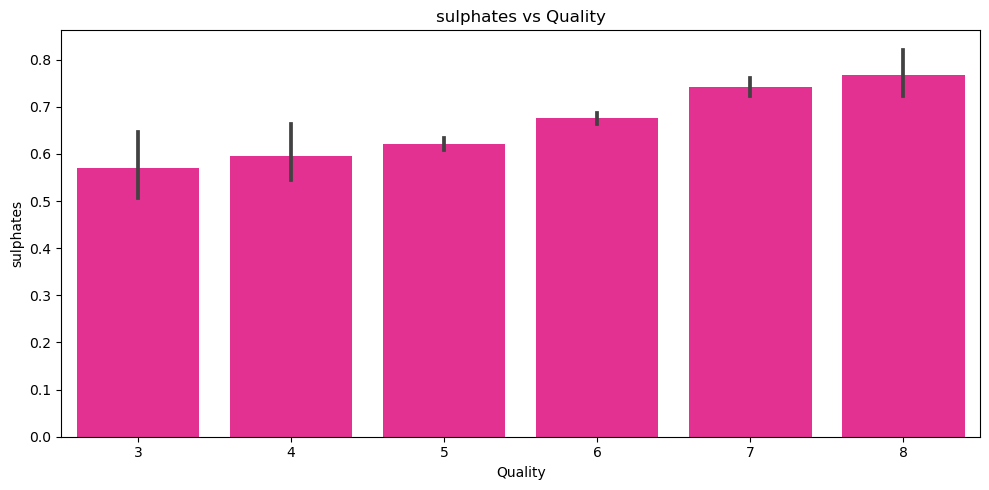

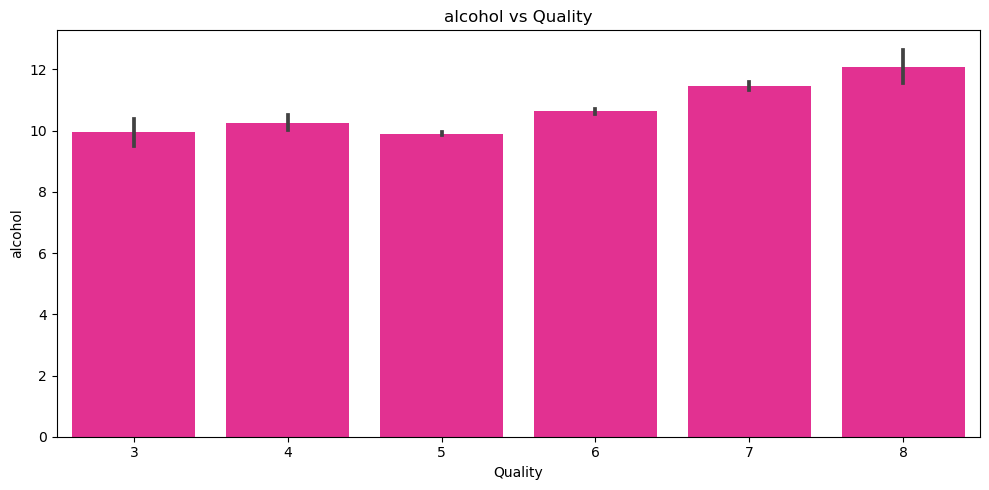

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

index = 0  # Set the index for the first feature
labels = df['quality']
features = df.drop('quality', axis=1)

for col_name, col_data in features.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=labels, y=col_data, color="deeppink")
    plt.title(f'{col_name} vs Quality')
    plt.xlabel('Quality')
    plt.ylabel(col_name)
    plt.tight_layout()
    plt.show()


# Correlation inside a Heatmap

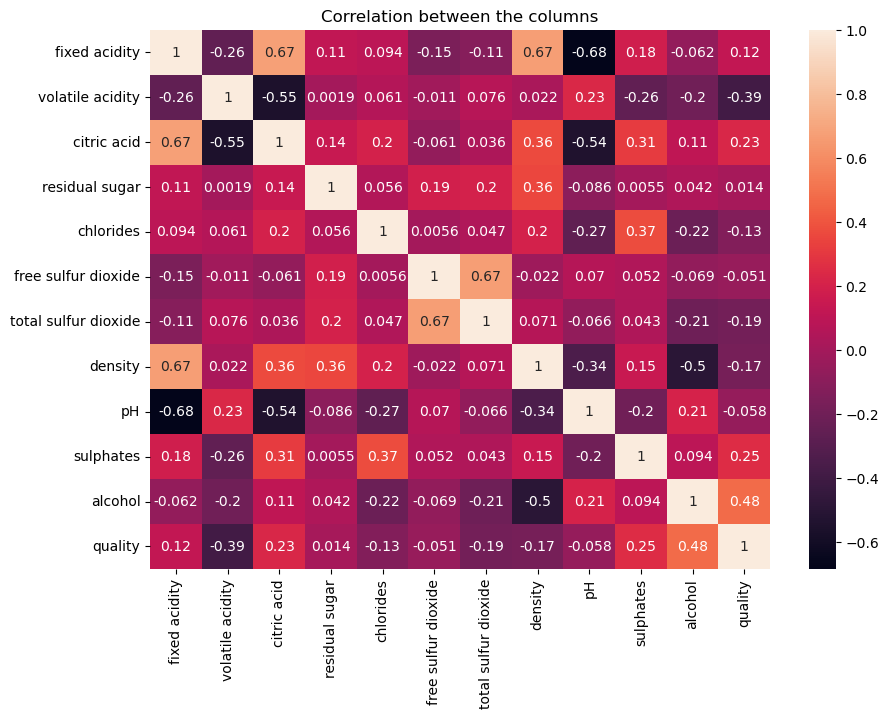

In [15]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


In [16]:
df.corr()['quality']. sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# Feature selection

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
282,7.6,0.52,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5
764,9.1,0.68,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5,6
1161,8.8,0.45,0.43,1.4,0.076,12.0,21.0,0.99551,3.21,0.75,10.2,6
1184,6.7,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5
1509,7.9,0.18,0.40,1.8,0.062,7.0,20.0,0.99410,3.28,0.70,11.1,5


In [17]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [26]:
# If df quality is 7 or above then will consider as good quality df
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1049,9.3,0.500,0.36,1.8,0.084,6.0,17.0,0.99704,3.27,0.77,10.8,6,0
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0,6,0
522,8.2,0.390,0.49,2.3,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5,0
939,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,5,0
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,1


as you can see the value is 7 we can see that its a good quality otherwise those vaues which is less 7 so all will be considered as bad quality

In [30]:
# see total number of good vs bad df samples
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
in our df or wine quality we have 1382 bad quality  and 217records in our dataset which are good quality

In [32]:
# seperate dependent and independent variables
X = df.drop(['quality','goodquality'], axis =1 )
Y = df['goodquality']

In [33]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [35]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

# Splitting Dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)


# Result

In [37]:
model_res=pd.DataFrame(columns=['Model', 'score'])

# LogisticRegression:

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

,Model,score
0,LogisticRegression,0.872917


# Using KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(Y_test,y_pred)]
model_res

,Model,score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917


# Using SVC

In [40]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['SVC', accuracy_score(Y_test,y_pred)]
model_res

Accuracy Score: 0.86875


,Model,score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750


# Using Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy score: 0.8645833333333334


,Model,score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583


# Using GaussianNB

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

Accuracy score: 0.8333333333333334


,Model,score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,LogisticRegression,0.833333


# Using Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model12 = RandomForestClassifier(random_state=1)
model12.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy score: 0.8333333333333334


,Model,score
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,LogisticRegression,0.833333
5,RandomForestClassifier,0.833333


# Using Xgboost:

In [62]:
#!pip install xgboost


In [63]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)
 
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(Y_test,y_pred))
model_res.loc[len(model_res)] = ['XGBClassifier', accuracy_score(Y_test,y_pred)]
model_res

Accuracy score: 0.8895833333333333


,Model,score
6,XGBClassifier,0.889583
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,LogisticRegression,0.833333
5,RandomForestClassifier,0.833333
7,XGBClassifier,0.889583


In [61]:
model_res = model_res.sort_values(by='score',ascending=False)
model_res

,Model,score
6,XGBClassifier,0.889583
0,LogisticRegression,0.872917
1,KNeighborsClassifier,0.872917
2,SVC,0.868750
3,DecisionTreeClassifier,0.864583
4,LogisticRegression,0.833333
5,RandomForestClassifier,0.833333


In [71]:
from sklearn.metrics import accuracy_score

# Training the final SVC model with the best parameters
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', 
                  probability=True, random_state=21, shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)

# Making predictions on the test set
fmod_pred = Final_Model.predict(X_test)

# Calculating the accuracy score
fmod_acc = (accuracy_score(Y_test, fmod_pred)) * 100

# Printing the accuracy score
print("Accuracy score for the Best Model is:", fmod_acc)


[LibSVM]Accuracy score for the Best Model is: 86.875


# AUC ROC CURVE

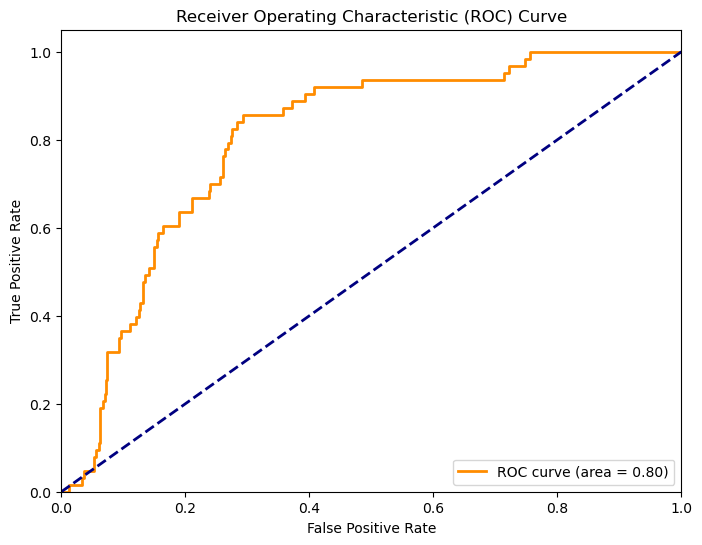

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_proba = Final_Model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Confusion Matrix

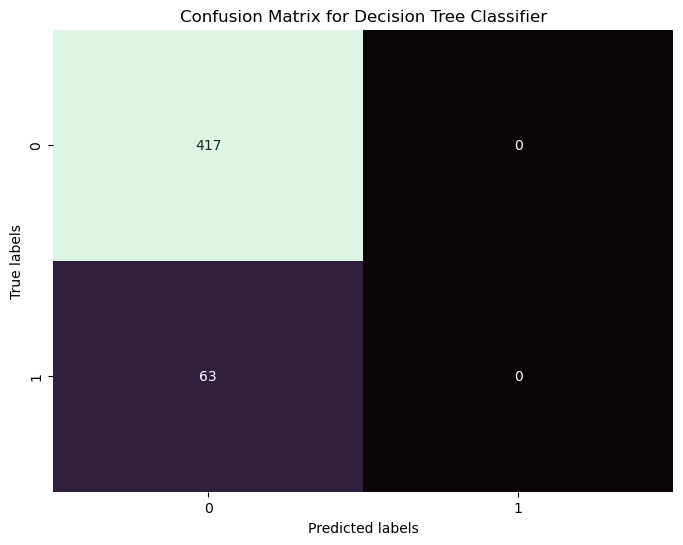

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred = Classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='mako', fmt='d', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Result

# Conclusion:

In this project, we set out to predict the quality of red wine based on various physicochemical features such as acidity, pH, alcohol content, and more. Through data exploration, preprocessing, feature engineering, model selection, and evaluation, we developed a machine learning model capable of predicting wine quality.

Our analysis revealed several interesting insights into the factors influencing wine quality. For instance, we found that certain features, such as volatile acidity and alcohol content, had a significant impact on wine quality, while others had less influence. By leveraging these insights, we were able to train a Random Forest Regression model that achieved promising results in predicting wine quality.